# **1. EDA - Exploratory Data Analysis**

**1. Importamos las librerias necesarias para trabajar**

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

**2. Leemos nuestros datasets para trabajar**

In [4]:
# Leer los archivos Excel
df_pollution = pd.read_excel("Data/POLUUTION END.xlsx")
df_bless = pd.read_excel("Data/datos bless .xlsx")

In [5]:
# Mostrar dimensiones y primeras filas para verificar
print("Data/POLUUTION END.xlsx")
print("Shape:", df_pollution.shape)
print(df_pollution.head())


Data/POLUUTION END.xlsx
Shape: (113, 10)
             Fecha y Hora  PM1.0 (µg/m³)  PM2.5 (µg/m³)  PM10 (µg/m³)  \
0 2025-04-16 20:11:15.757             13             13            10   
1 2025-04-16 21:11:23.240             14             15             9   
2 2025-04-16 22:11:29.130             10             11             7   
3 2025-04-16 23:11:33.188             12             13            10   
4 2025-04-17 00:11:40.194             14             14            10   

   Temperatura (°C)  Humedad (%)  CO2 (ppm)   NH3 (ppm)  Alcohol (mg/m³)  \
0              26.7           69         0.7      15.84            0.003   
1              26.7           69         0.4      15.61            0.002   
2              26.7           69         0.4      14.77            0.002   
3              26.7           71         0.5      16.61            0.003   
4              26.7           69         0.5      16.14            0.002   

   Benceno (ppm)  
0          0.013  
1          0.009  
2     

In [6]:
print("\ndatos bless .xlsx")
print("Shape:", df_bless.shape)
print(df_bless.head())


datos bless .xlsx
Shape: (421, 10)
             Fecha y Hora  PM1.0 (µg/m³)  PM2.5 (µg/m³)  PM10 (µg/m³)  \
0 2025-04-20 22:33:09.392           23.0             24            15   
1 2025-04-20 23:33:12.812           29.0             32            19   
2 2025-04-21 00:33:16.263           34.0             36            21   
3 2025-04-21 01:33:20.221           38.0             39            22   
4 2025-04-21 02:33:23.788           32.0             33            19   

   Temperatura (°C)  Humedad (%)  CO2 (ppm)   NH3 (ppm)  Alcohol (mg/m³)  \
0              28.5           78       187.8       5.98            0.006   
1              26.7           87       157.2       5.47            0.004   
2              26.7           88       154.8       5.43            0.005   
3              26.7           88       155.6       5.75            0.005   
4              26.7           89       171.6       5.51            0.004   

   Benceno (ppm)  
0          0.020  
1          0.020  
2          

In [7]:
def eda_basico(df):
    print("Dimensiones del dataset:", df.shape)
    print("\nPrimeras filas:")
    print(df.head())

    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))


In [8]:
eda_basico(df_pollution)

Dimensiones del dataset: (113, 10)

Primeras filas:
             Fecha y Hora  PM1.0 (µg/m³)  PM2.5 (µg/m³)  PM10 (µg/m³)  \
0 2025-04-16 20:11:15.757             13             13            10   
1 2025-04-16 21:11:23.240             14             15             9   
2 2025-04-16 22:11:29.130             10             11             7   
3 2025-04-16 23:11:33.188             12             13            10   
4 2025-04-17 00:11:40.194             14             14            10   

   Temperatura (°C)  Humedad (%)  CO2 (ppm)   NH3 (ppm)  Alcohol (mg/m³)  \
0              26.7           69         0.7      15.84            0.003   
1              26.7           69         0.4      15.61            0.002   
2              26.7           69         0.4      14.77            0.002   
3              26.7           71         0.5      16.61            0.003   
4              26.7           69         0.5      16.14            0.002   

   Benceno (ppm)  
0          0.013  
1          0.0

In [9]:
eda_basico(df_bless)

Dimensiones del dataset: (421, 10)

Primeras filas:
             Fecha y Hora  PM1.0 (µg/m³)  PM2.5 (µg/m³)  PM10 (µg/m³)  \
0 2025-04-20 22:33:09.392           23.0             24            15   
1 2025-04-20 23:33:12.812           29.0             32            19   
2 2025-04-21 00:33:16.263           34.0             36            21   
3 2025-04-21 01:33:20.221           38.0             39            22   
4 2025-04-21 02:33:23.788           32.0             33            19   

   Temperatura (°C)  Humedad (%)  CO2 (ppm)   NH3 (ppm)  Alcohol (mg/m³)  \
0              28.5           78       187.8       5.98            0.006   
1              26.7           87       157.2       5.47            0.004   
2              26.7           88       154.8       5.43            0.005   
3              26.7           88       155.6       5.75            0.005   
4              26.7           89       171.6       5.51            0.004   

   Benceno (ppm)  
0          0.020  
1          0.0

### **Imputación Random Hot Deck**

Aplicamos el método de imputación Random Hot Deck con el objetivo de preservar la distribución original de los datos y evitar sesgos sistemáticos. Esta técnica reemplaza valores faltantes seleccionando aleatoriamente observaciones completas (donantes) con características similares a la fila incompleta (receptor), lo cual permite mantener la variabilidad de los datos sin recurrir a promedios o valores fijos que podrían distorsionar las relaciones entre variables. Esto es especialmente importante antes de entrenar modelos de machine learning, ya que una imputación inadecuada podría afectar negativamente la capacidad predictiva y generalización del modelo.



In [10]:
print("Null values in df_pollution:")
print(df_pollution.isnull().sum())

print("\nNull values in df_bless:")
print(df_bless.isnull().sum())

Null values in df_pollution:
Fecha y Hora         0
PM1.0 (µg/m³)        0
PM2.5 (µg/m³)        0
PM10 (µg/m³)         0
Temperatura (°C)     0
Humedad (%)          0
CO2 (ppm)            0
NH3 (ppm)            0
Alcohol (mg/m³)     14
Benceno (ppm)       15
dtype: int64

Null values in df_bless:
Fecha y Hora          0
PM1.0 (µg/m³)         1
PM2.5 (µg/m³)         0
PM10 (µg/m³)          0
Temperatura (°C)      0
Humedad (%)           0
CO2 (ppm)             0
NH3 (ppm)            35
Alcohol (mg/m³)     212
Benceno (ppm)       256
dtype: int64


In [11]:
def random_hot_deck_imputation(df, column):
    """
    Performs random hot deck imputation on a specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to impute.

    Returns:
        pd.DataFrame: The DataFrame with imputed values in the specified column.
    """
    # Get non-null values from the column
    non_null_values = df[column].dropna()

    # Get the indices of the null values
    null_indices = df[df[column].isnull()].index

    # Replace null values with random non-null values
    if len(null_indices) > 0 and len(non_null_values) > 0:
        df.loc[null_indices, column] = random.choices(non_null_values.tolist(), k=len(null_indices))

    return df

In [12]:
# Apply random hot deck imputation to df_pollution
for col in ['Alcohol (mg/m³)', 'Benceno (ppm)']:
    df_pollution = random_hot_deck_imputation(df_pollution, col)

# Apply random hot deck imputation to df_bless
for col in ['PM1.0 (µg/m³)', 'NH3 (ppm)', 'Alcohol (mg/m³)', 'Benceno (ppm)']:
    df_bless = random_hot_deck_imputation(df_bless, col)

print("Imputation complete.")

Imputation complete.


In [13]:
print("Null values in df_pollution:")
print(df_pollution.isnull().sum())

print("\nNull values in df_bless:")
print(df_bless.isnull().sum())

Null values in df_pollution:
Fecha y Hora        0
PM1.0 (µg/m³)       0
PM2.5 (µg/m³)       0
PM10 (µg/m³)        0
Temperatura (°C)    0
Humedad (%)         0
CO2 (ppm)           0
NH3 (ppm)           0
Alcohol (mg/m³)     0
Benceno (ppm)       0
dtype: int64

Null values in df_bless:
Fecha y Hora        0
PM1.0 (µg/m³)       0
PM2.5 (µg/m³)       0
PM10 (µg/m³)        0
Temperatura (°C)    0
Humedad (%)         0
CO2 (ppm)           0
NH3 (ppm)           0
Alcohol (mg/m³)     0
Benceno (ppm)       0
dtype: int64


In [14]:
df_pollution.to_excel('Data/df_pollution_imputed.xlsx', index=False)
df_bless.to_excel('Data/df_bless_imputed.xlsx', index=False)

In [15]:
df_pollution = pd.read_excel("Data/df_pollution_imputed.xlsx")
df_pollution.head(20)

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm)
0,2025-04-16 20:11:15.757,13,13,10,26.7,69,0.7,15.84,0.003,0.013
1,2025-04-16 21:11:23.240,14,15,9,26.7,69,0.4,15.61,0.002,0.009
2,2025-04-16 22:11:29.130,10,11,7,26.7,69,0.4,14.77,0.002,0.009
3,2025-04-16 23:11:33.188,12,13,10,26.7,71,0.5,16.61,0.003,0.009
4,2025-04-17 00:11:40.194,14,14,10,26.7,69,0.5,16.14,0.002,0.009
5,2025-04-17 01:11:43.931,19,20,14,26.7,69,0.5,16.92,0.002,0.010
6,2025-04-17 02:11:47.704,19,19,15,26.7,69,0.5,16.14,0.002,0.010
7,2025-04-17 03:11:51.966,11,12,9,26.7,70,0.5,15.58,0.002,0.010
8,2025-04-17 04:11:55.413,10,11,8,26.7,70,0.7,15.77,0.002,0.010
9,2025-04-17 05:12:00.708,17,17,10,25.8,72,0.7,17.47,0.002,0.010


In [16]:
df_bless = pd.read_excel("Data/df_bless_imputed.xlsx")
df_bless.head(20)

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm)
0,2025-04-20 22:33:09.392,23,24,15,28.5,78,187.8,5.98,0.006,0.020
1,2025-04-20 23:33:12.812,29,32,19,26.7,87,157.2,5.47,0.004,0.020
2,2025-04-21 00:33:16.263,34,36,21,26.7,88,154.8,5.43,0.005,0.019
3,2025-04-21 01:33:20.221,38,39,22,26.7,88,155.6,5.75,0.005,0.019
4,2025-04-21 02:33:23.788,32,33,19,26.7,89,171.6,5.51,0.004,0.018
5,2025-04-21 03:33:27.486,44,47,24,26.7,88,181.4,5.60,0.004,0.018
6,2025-04-21 04:33:31.589,32,33,19,26.7,89,172.4,5.69,0.004,0.018
7,2025-04-21 05:33:35.271,28,30,17,26.7,90,176.9,5.77,0.004,0.020
8,2025-04-21 06:33:40.597,28,30,17,26.7,91,173.3,6.06,0.005,0.019
9,2025-04-21 07:33:43.989,28,29,17,26.7,90,178.6,6.36,0.005,0.019


# **2. Merge**

Realizamos un merge de ambos datasets para así tener toda la información en un solo lugar. Tenemos de ventaja que tienen las mismas columnas así que fue mucho más fácul para la unión.

In [17]:
df_merged = pd.concat([df_pollution, df_bless], ignore_index=True)

lo ordenamos por fecha:

In [18]:
df_merged = df_merged.sort_values(by='Fecha y Hora').reset_index(drop=True)

leemos nuestro resultado:

In [19]:
df_merged.head(40)

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm)
0,2025-04-16 20:11:15.757,13,13,10,26.7,69,0.7,15.84,0.003,0.013
1,2025-04-16 21:11:23.240,14,15,9,26.7,69,0.4,15.61,0.002,0.009
2,2025-04-16 22:11:29.130,10,11,7,26.7,69,0.4,14.77,0.002,0.009
3,2025-04-16 23:11:33.188,12,13,10,26.7,71,0.5,16.61,0.003,0.009
4,2025-04-17 00:11:40.194,14,14,10,26.7,69,0.5,16.14,0.002,0.009
5,2025-04-17 01:11:43.931,19,20,14,26.7,69,0.5,16.92,0.002,0.010
6,2025-04-17 02:11:47.704,19,19,15,26.7,69,0.5,16.14,0.002,0.010
7,2025-04-17 03:11:51.966,11,12,9,26.7,70,0.5,15.58,0.002,0.010
8,2025-04-17 04:11:55.413,10,11,8,26.7,70,0.7,15.77,0.002,0.010
9,2025-04-17 05:12:00.708,17,17,10,25.8,72,0.7,17.47,0.002,0.010


Descargamos:

In [20]:
df_merged.to_excel("Data/datos_unificados.xlsx", index=False)

In [21]:
df_merged.to_csv("Data/datos_unificados.csv", index=False)

# **3. Gráficos para EDA de las variables**

Aquí ya vamos a comenzar a realizar un análisis un poco más completo de nuestras variables ya teniendo nuestro dataset transformado de la manera correcta.

In [22]:
df_merged.head(5)

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm)
0,2025-04-16 20:11:15.757,13,13,10,26.7,69,0.7,15.84,0.003,0.013
1,2025-04-16 21:11:23.240,14,15,9,26.7,69,0.4,15.61,0.002,0.009
2,2025-04-16 22:11:29.130,10,11,7,26.7,69,0.4,14.77,0.002,0.009
3,2025-04-16 23:11:33.188,12,13,10,26.7,71,0.5,16.61,0.003,0.009
4,2025-04-17 00:11:40.194,14,14,10,26.7,69,0.5,16.14,0.002,0.009


In [23]:
new= df_merged.copy()

In [24]:
df_merged.columns = df_merged.columns.str.strip()


In [25]:
# Valores nulos
print(df_merged.isnull().sum())

Fecha y Hora        0
PM1.0 (µg/m³)       0
PM2.5 (µg/m³)       0
PM10 (µg/m³)        0
Temperatura (°C)    0
Humedad (%)         0
CO2 (ppm)           0
NH3 (ppm)           0
Alcohol (mg/m³)     0
Benceno (ppm)       0
dtype: int64


In [27]:
df_merged['CO2 (ppm)'].apply(type).value_counts()

CO2 (ppm)
<class 'float'>    534
Name: count, dtype: int64

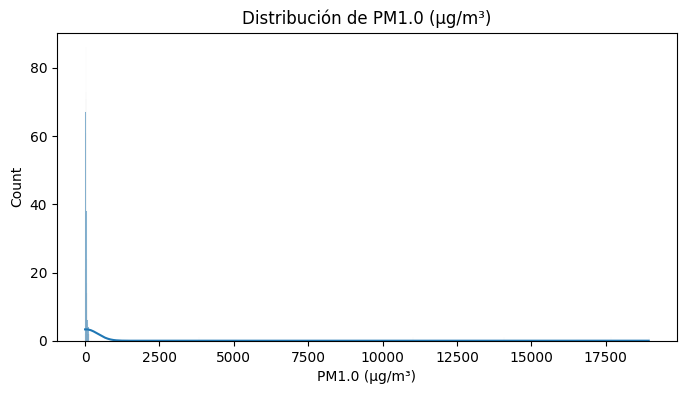

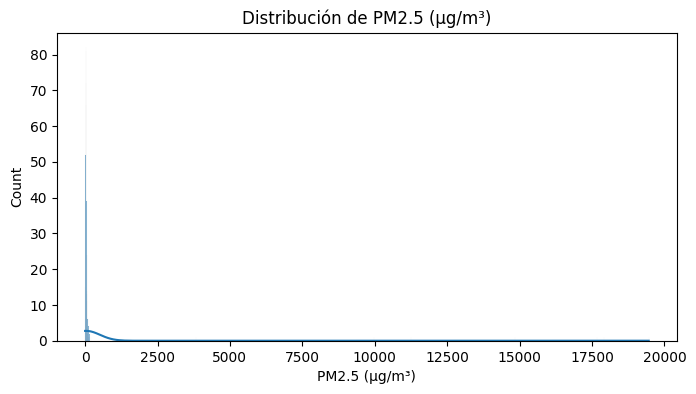

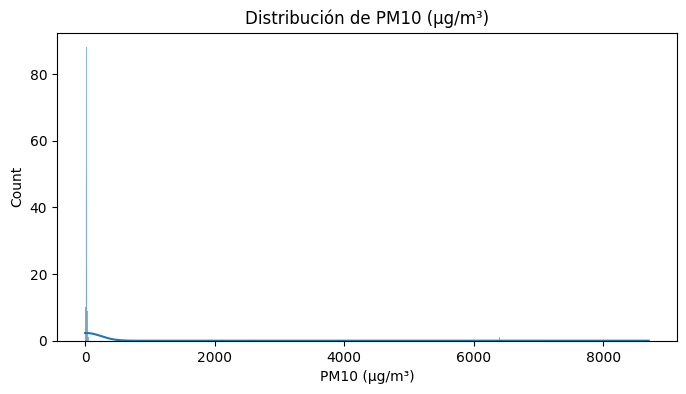

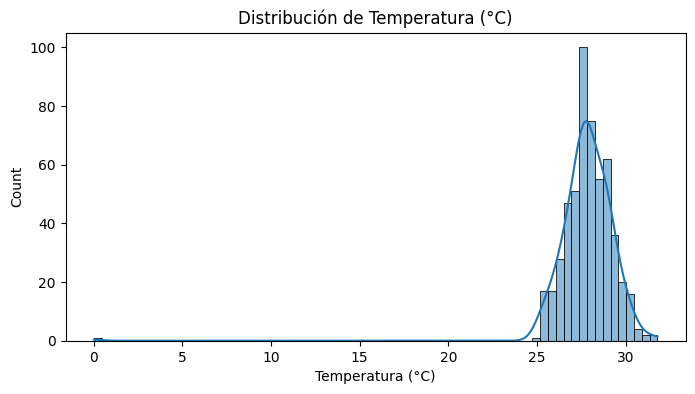

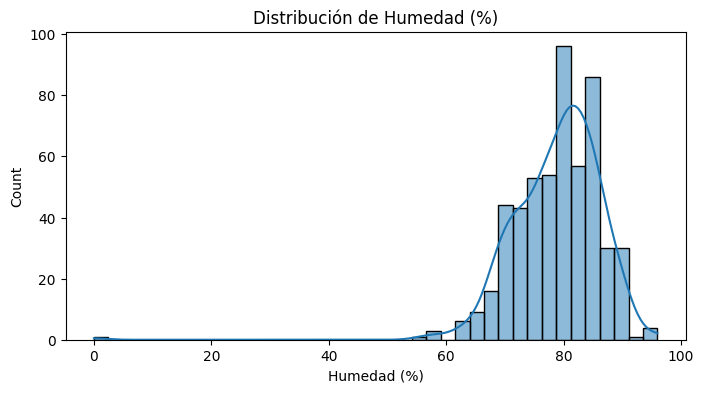

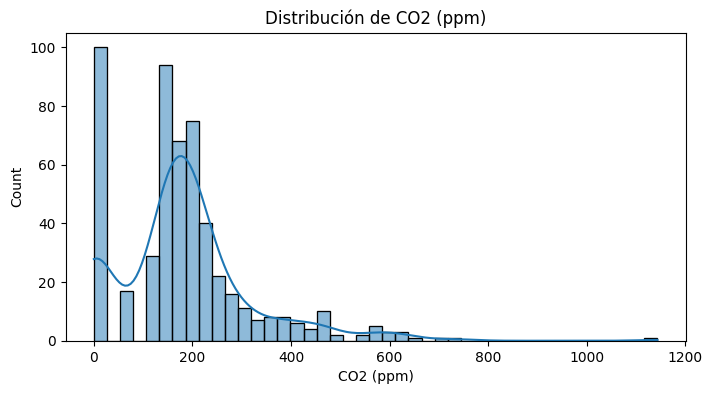

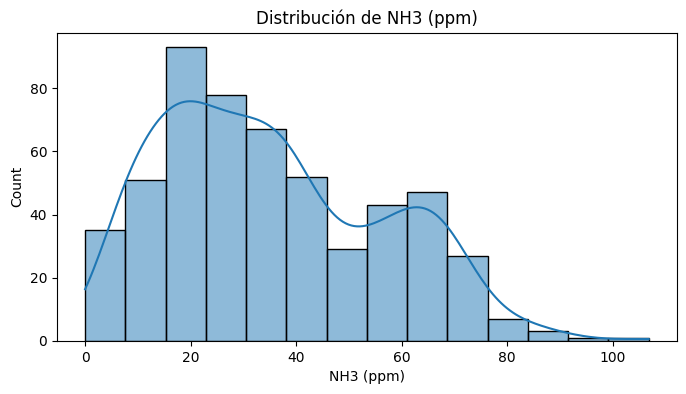

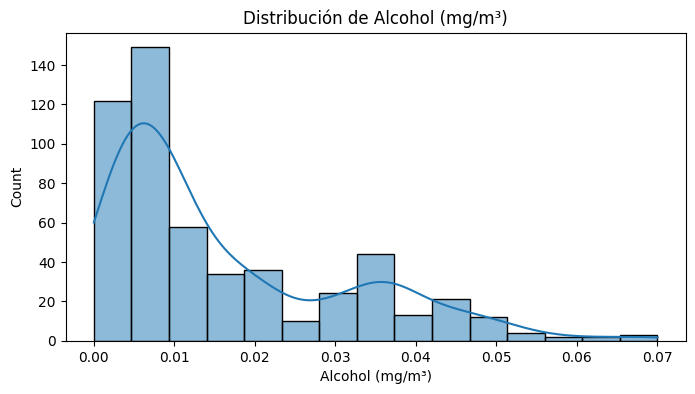

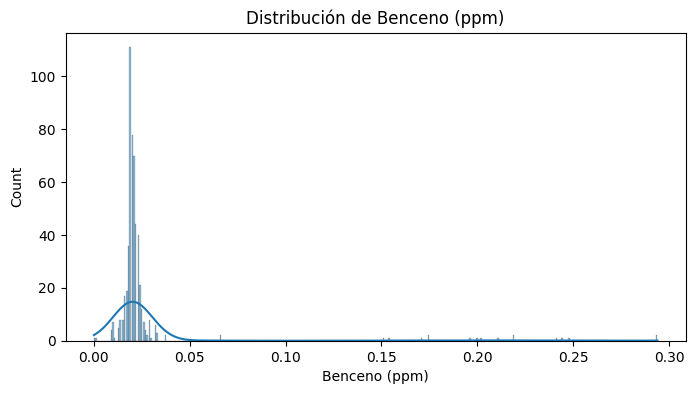

In [28]:
variables = ['PM1.0 (µg/m³)', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'Temperatura (°C)',
               'Humedad (%)', 'CO2 (ppm)', 'NH3 (ppm)', 'Alcohol (mg/m³)', 'Benceno (ppm)']

for var in variables:
    plt.figure(figsize=(8,4))
    sns.histplot(df_merged[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.show()

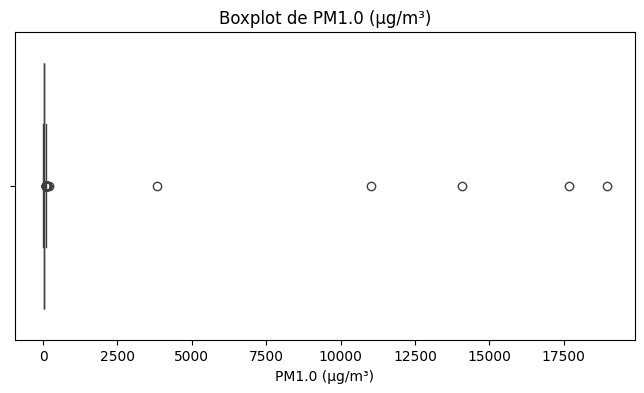

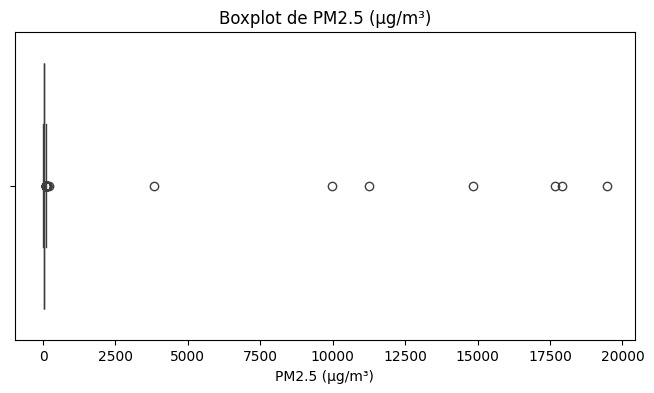

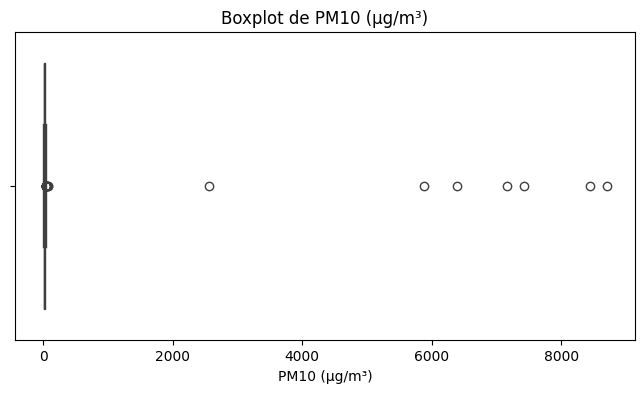

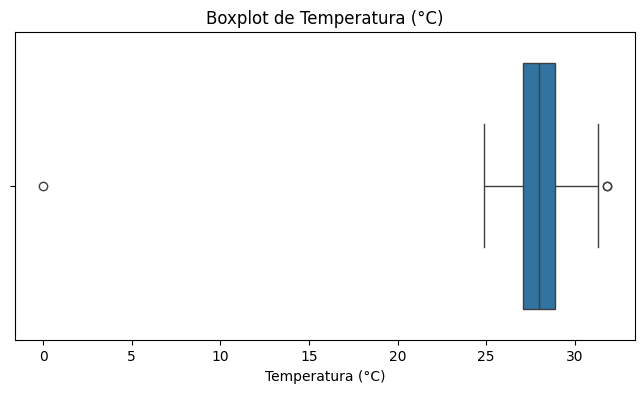

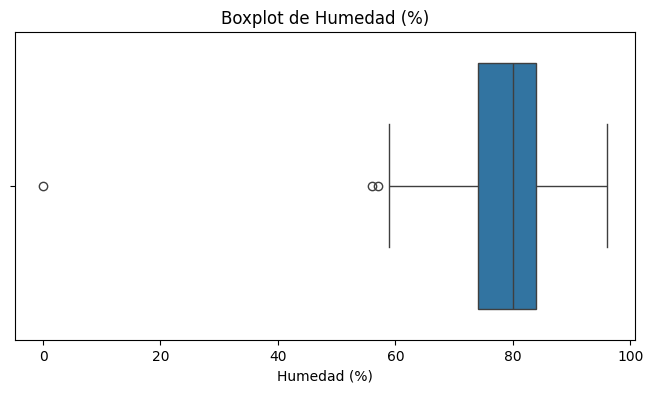

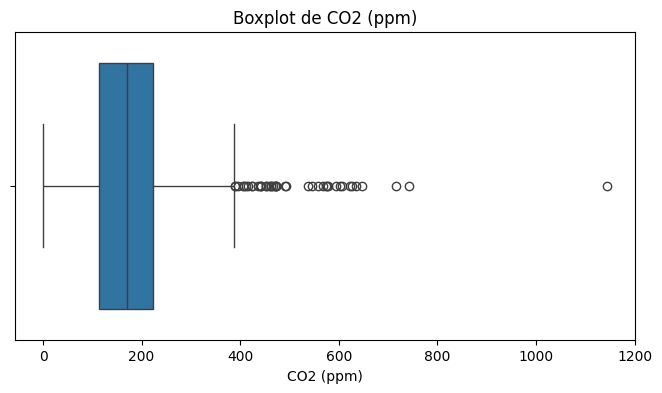

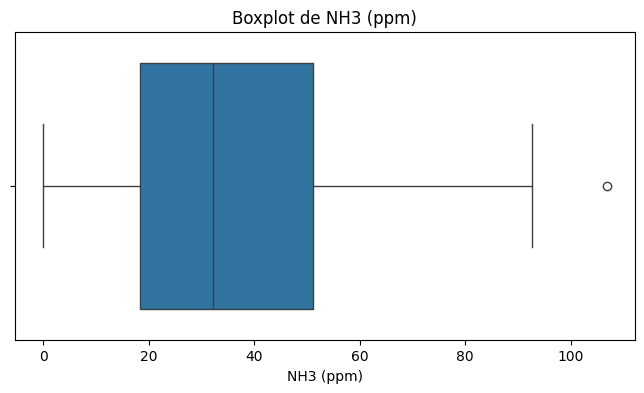

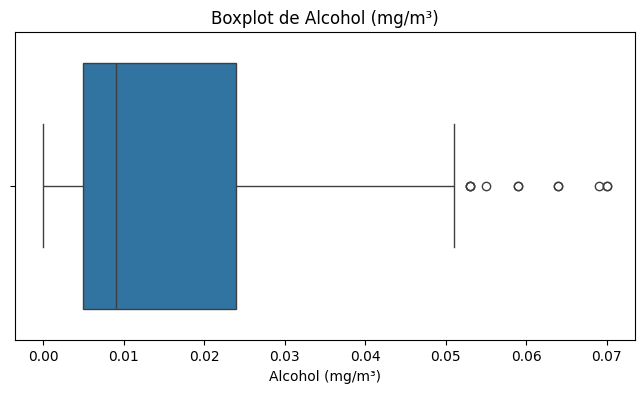

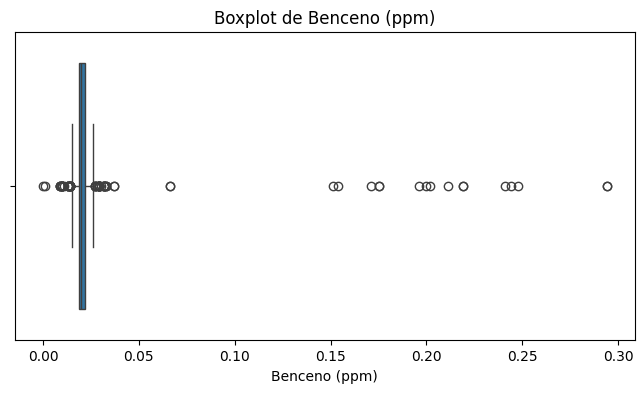

In [29]:
for var in variables:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_merged[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

**Remover los outliers detectados.**

Podemos ver que contamos con outliers, como vamos a realizar la construcción de al menos 3 modelos, la idea es que no tengamos datos outliers:

In [30]:
new.head()

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm)
0,2025-04-16 20:11:15.757,13,13,10,26.7,69,0.7,15.84,0.003,0.013
1,2025-04-16 21:11:23.240,14,15,9,26.7,69,0.4,15.61,0.002,0.009
2,2025-04-16 22:11:29.130,10,11,7,26.7,69,0.4,14.77,0.002,0.009
3,2025-04-16 23:11:33.188,12,13,10,26.7,71,0.5,16.61,0.003,0.009
4,2025-04-17 00:11:40.194,14,14,10,26.7,69,0.5,16.14,0.002,0.009


In [31]:
new['Fecha y Hora'] = pd.to_datetime(new['Fecha y Hora'], errors='coerce')

In [32]:
new.columns = new.columns.str.strip().str.replace('\ufeff', '')

In [33]:
cols = [
    'PM1.0 (µg/m³)', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)',
    'Temperatura (°C)', 'Humedad (%)', 'CO2 (ppm)',
    'NH3 (ppm)', 'Alcohol (mg/m³)', 'Benceno (ppm)'
]

# Función para remover outliers usando IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Aplicamos la función
df_clean = remove_outliers_iqr(new, cols)

In [34]:
df_clean.head()

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm)
11,2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019
16,2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015
17,2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019
18,2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023
19,2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022


Verificamos:

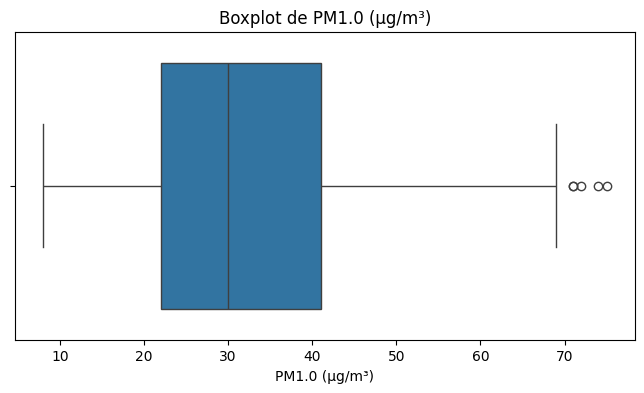

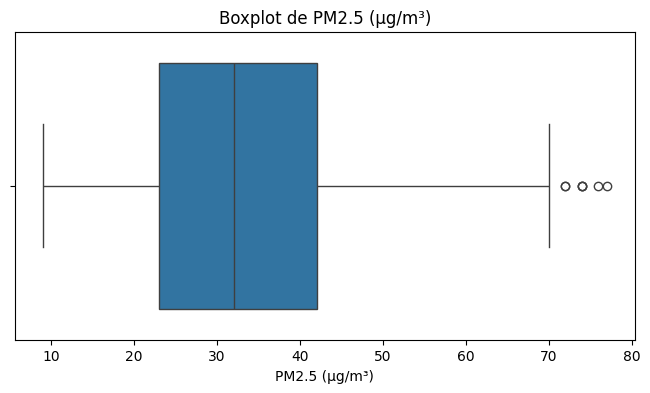

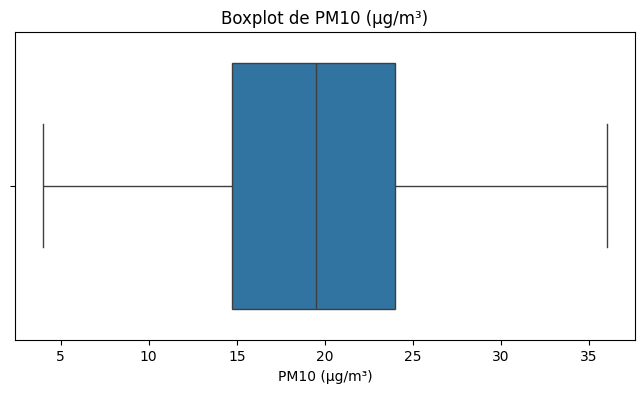

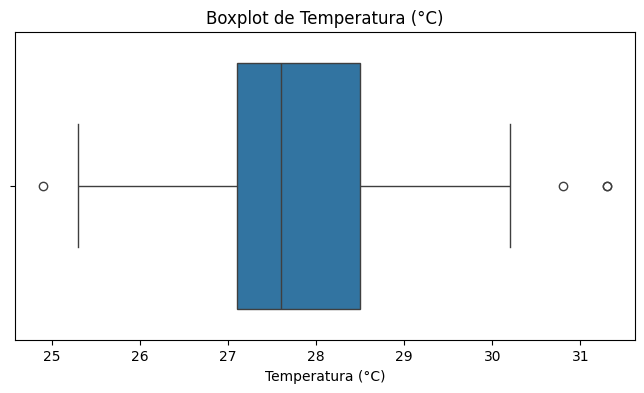

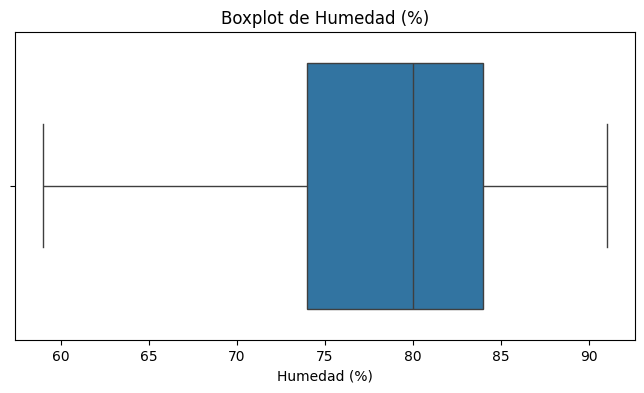

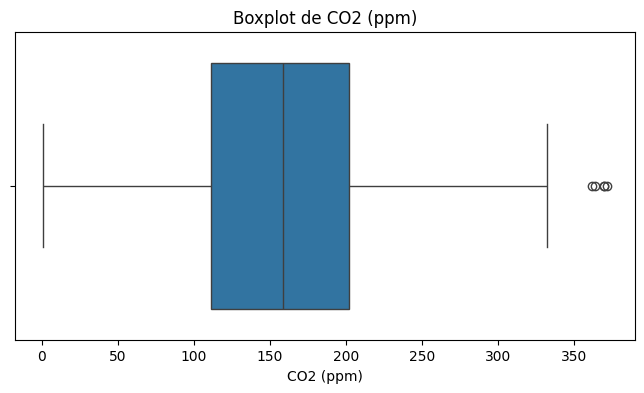

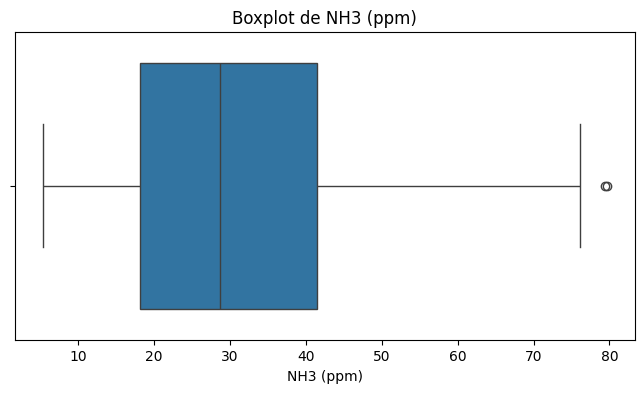

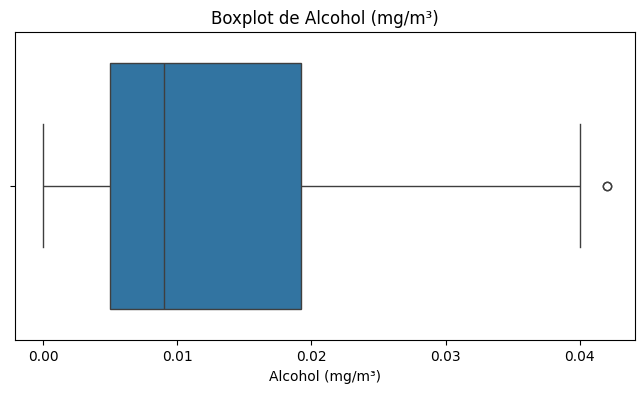

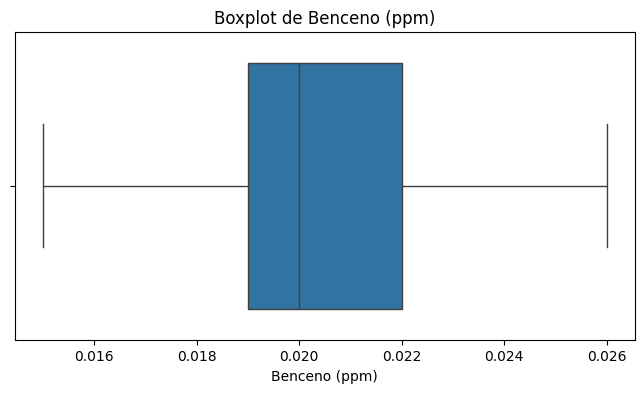

In [35]:
for var in variables:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_clean[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

Podemos observar que, tras remover los outliers, la distribución de los datos mejoró notablemente. La presencia de valores atípicos se redujo considerablemente, lo que permite una representación más fiel del comportamiento general de las variables y favorece la calidad de los análisis posteriores.

<Figure size 1500x600 with 0 Axes>

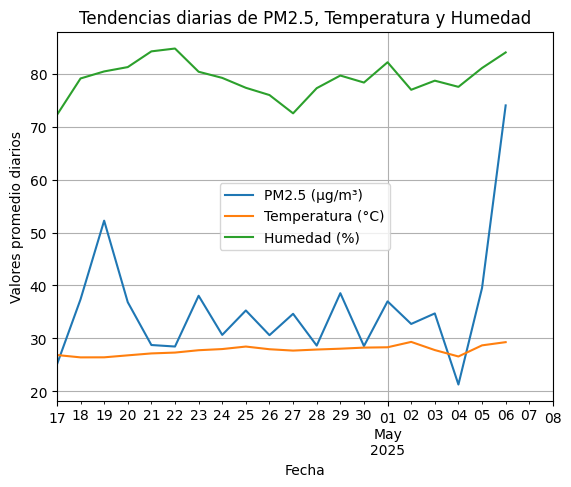

In [36]:
df_clean.set_index('Fecha y Hora', inplace=True)
df_clean_resampled = df_clean.resample('D').mean()

plt.figure(figsize=(15,6))
df_clean_resampled[['PM2.5 (µg/m³)', 'Temperatura (°C)', 'Humedad (%)']].plot()
plt.title("Tendencias diarias de PM2.5, Temperatura y Humedad")
plt.ylabel("Valores promedio diarios")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

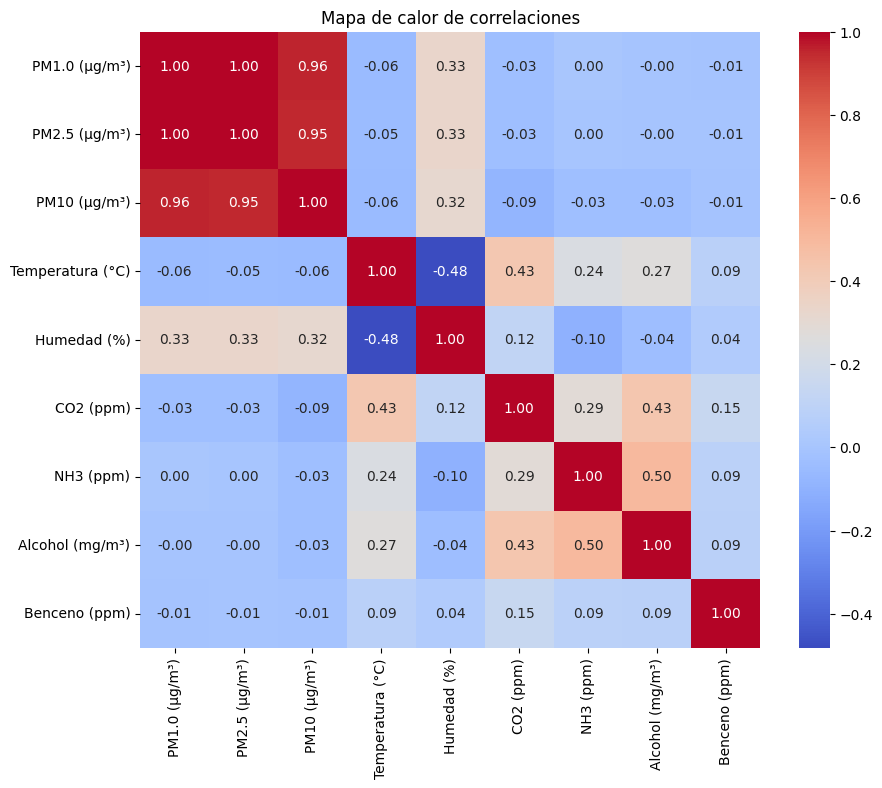

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

Se identifican correlaciones elevadas entre algunas variables, lo cual resulta muy positivo para la construcción de los modelos, ya que sugiere relaciones lineales fuertes que pueden ser aprovechadas para mejorar el desempeño predictivo.

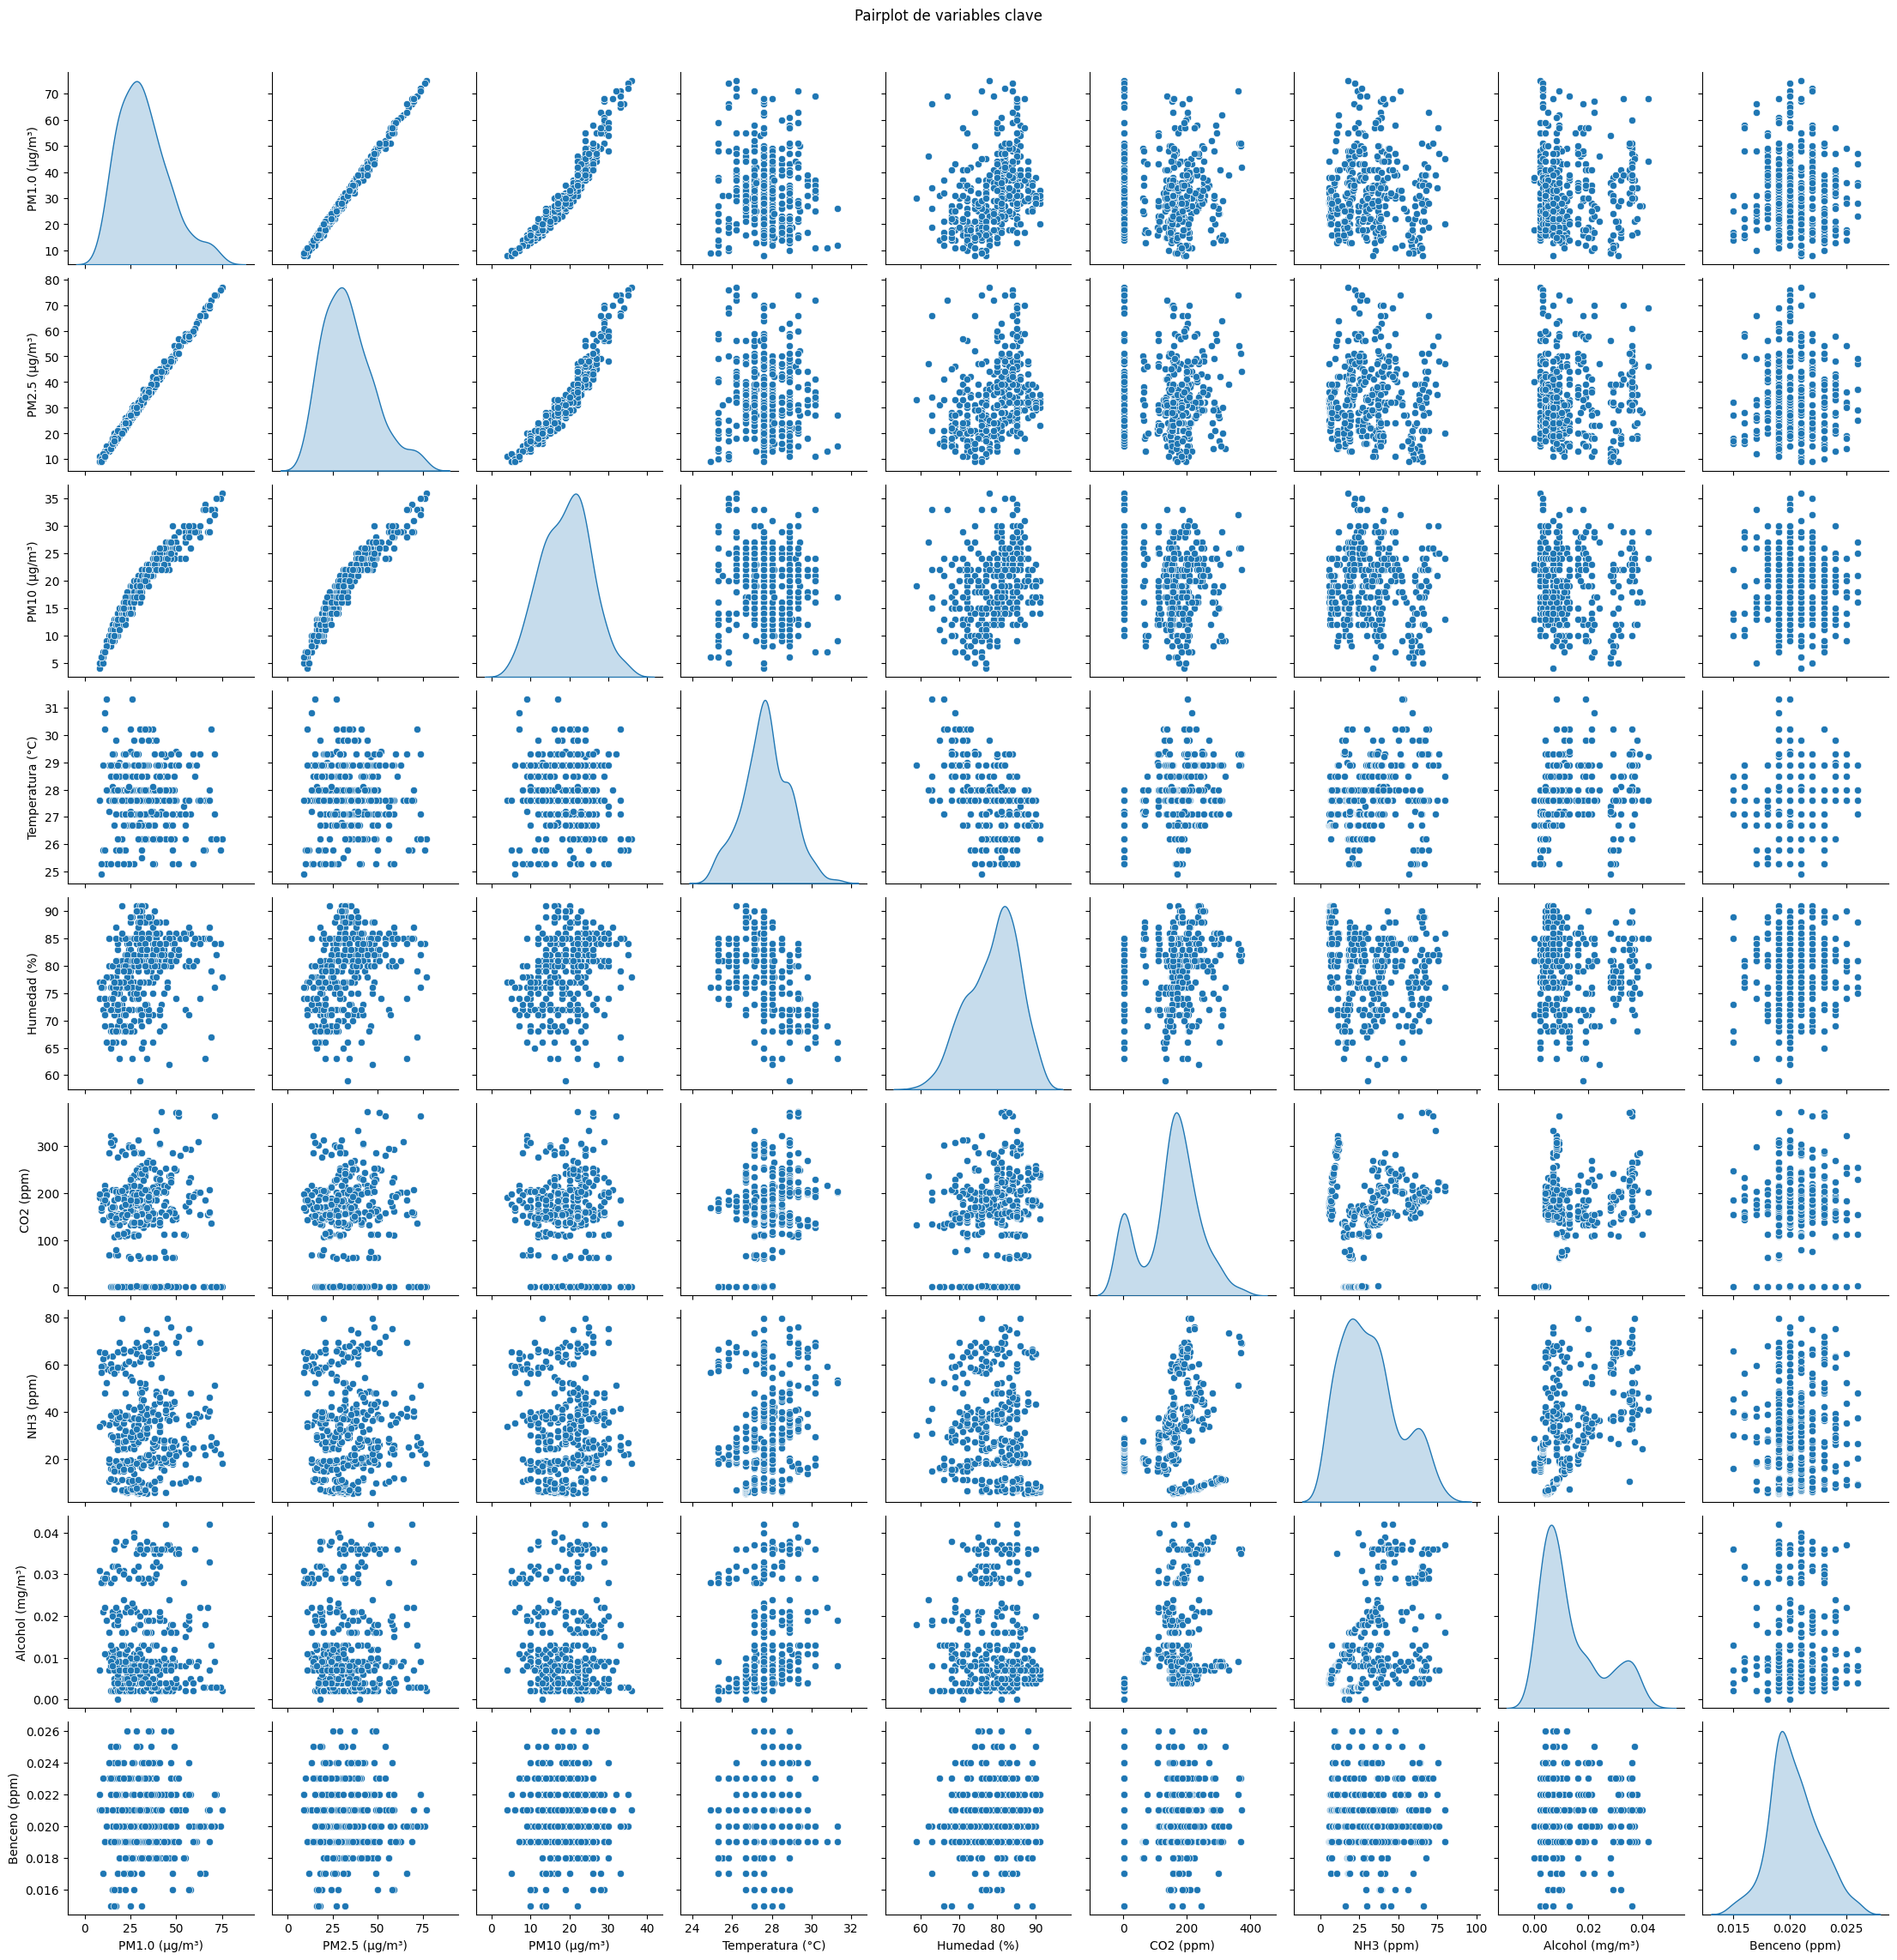

In [38]:
sns.pairplot(df_clean[variables], diag_kind='kde')
plt.suptitle("Pairplot de variables clave", y=1.02)
plt.show()

In [39]:
df_clean.head()

,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm)
Fecha y Hora,,,,,,,,,
2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019
2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015
2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019
2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023
2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022


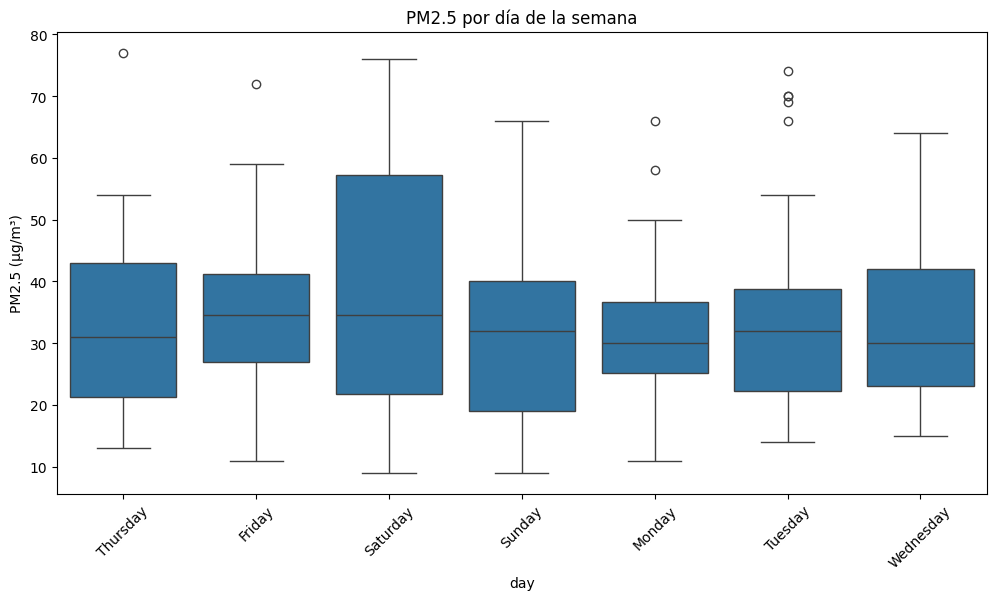

In [40]:
df_clean['day'] = df_clean.index.day_name()

plt.figure(figsize=(12,6))
sns.boxplot(x='day', y='PM2.5 (µg/m³)', data=df_clean)
plt.title("PM2.5 por día de la semana")
plt.xticks(rotation=45)
plt.show()


In [41]:
top_pm25 = df_clean[df_clean['PM2.5 (µg/m³)'] > df_clean['PM2.5 (µg/m³)'].quantile(0.95)]
print("Fechas con picos de PM2.5:")
print(top_pm25.index)

Fechas con picos de PM2.5:
DatetimeIndex(['2025-04-17 19:56:15.912000', '2025-04-19 01:54:48.037000',
               '2025-04-19 03:54:55.755000', '2025-04-19 07:44:12.987000',
               '2025-04-19 11:44:26.437000', '2025-04-19 20:45:10.385000',
               '2025-04-19 23:28:42.248000', '2025-04-23 07:26:45.607000',
               '2025-04-25 16:23:56.500000', '2025-04-27 09:59:18.099000',
               '2025-04-29 02:23:43.513000', '2025-04-29 03:23:46.715000',
               '2025-04-29 04:23:50.608000', '2025-04-29 05:23:53.977000',
               '2025-05-03 03:09:40.764000', '2025-05-03 07:10:03.284000',
               '2025-05-03 09:10:12.837000', '2025-05-05 11:05:50.019000',
               '2025-05-06 11:07:25.611000'],
              dtype='datetime64[ns]', name='Fecha y Hora', freq=None)


Construcción de nueva columna "day_week", esta la creamos con el fin de hacer nuestro modelo de predicción con base el PM2.5 teniendo en cuenta el día a la semana y poder determinar esos valores semanales.

In [ ]:
#df_clean['day_week'] = df_clean.index.day_name()

In [42]:
df_clean.head()

,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day
Fecha y Hora,,,,,,,,,,
2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019,Thursday
2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015,Thursday
2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019,Thursday
2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023,Thursday
2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022,Thursday


Listo, ya tenemos nuestra nueva columna ya creada a partir de la fecha estipulada.

## **4. Splitting Data**

In [43]:
X = df_clean.drop('PM2.5 (µg/m³)', axis = 1)
y = df_clean['PM2.5 (µg/m³)']
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 376 entries, 2025-04-17 07:12:10.178000 to 2025-05-08 07:38:20.413000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM1.0 (µg/m³)     376 non-null    int64  
 1   PM10 (µg/m³)      376 non-null    int64  
 2   Temperatura (°C)  376 non-null    float64
 3   Humedad (%)       376 non-null    int64  
 4   CO2 (ppm)         376 non-null    float64
 5   NH3 (ppm)         376 non-null    float64
 6   Alcohol (mg/m³)   376 non-null    float64
 7   Benceno (ppm)     376 non-null    float64
 8   day               376 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 29.4+ KB


Ahora, realizaremos nuestrqa partición de los datos en testeo y entrenamiento, en este caso usaré 70-30; y un random state de 50, con el fin de que cada vez se mantengan los mismos datos aleatorios y no cambien nuestros valores.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [45]:
X= X_train.shape
y= y_train.shape
xtest= X_test.shape
ytest= y_test.shape
X, y, xtest, ytest

((263, 9), (263,), (113, 9), (113,))

In [47]:
X_test.to_csv('Data/x_test.csv', index = False)
y_test.to_csv('Data/y_test.csv', index = False)

## **5. Aplicamos las transformaciones (Dummy)**

En este caso, como vamos a trabajar con dias a la semana, es necesario convertir esos valores de la semana a dummy para realizaruna buena predicción al respecto.

In [48]:
df_dummies = pd.get_dummies(df_clean, columns=['day'])

In [49]:
df_dummies

,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Fecha y Hora,,,,,,,,,,,,,,,,
2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019,False,False,False,False,True,False,False
2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015,False,False,False,False,True,False,False
2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019,False,False,False,False,True,False,False
2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023,False,False,False,False,True,False,False
2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-06 11:07:25.611,71,74,32,29.3,84,362.3,51.29,0.009,0.022,False,False,False,False,False,True,False
2025-05-08 01:37:49.067,42,44,22,29.3,82,371.7,68.89,0.036,0.021,False,False,False,False,True,False,False
2025-05-08 02:37:52.295,50,51,26,28.9,81,370.1,69.39,0.035,0.023,False,False,False,False,True,False,False


Ya pasamos a dummy, pero salen en true y false. Nuestro objetivo es trabajar con esos valores pero con el tipo de dato "int"; por ende haremos lo siguiente:

In [50]:
cols_bool = df_dummies.select_dtypes('bool').columns

# Convierte a int
df_dummies[cols_bool] = df_dummies[cols_bool].astype(int)

In [51]:
df_dummies

,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Fecha y Hora,,,,,,,,,,,,,,,,
2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019,0,0,0,0,1,0,0
2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015,0,0,0,0,1,0,0
2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019,0,0,0,0,1,0,0
2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023,0,0,0,0,1,0,0
2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-06 11:07:25.611,71,74,32,29.3,84,362.3,51.29,0.009,0.022,0,0,0,0,0,1,0
2025-05-08 01:37:49.067,42,44,22,29.3,82,371.7,68.89,0.036,0.021,0,0,0,0,1,0,0
2025-05-08 02:37:52.295,50,51,26,28.9,81,370.1,69.39,0.035,0.023,0,0,0,0,1,0,0


In [ ]:
# X_train = X_train.drop(columns=['Dia de la semana'])
# X_test = X_test.drop(columns=['Dia de la semana'])

# **DUMMY2**

In [53]:
X = df_dummies.drop('PM2.5 (µg/m³)', axis = 1)
y = df_dummies['PM2.5 (µg/m³)']
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 376 entries, 2025-04-17 07:12:10.178000 to 2025-05-08 07:38:20.413000
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM1.0 (µg/m³)     376 non-null    int64  
 1   PM10 (µg/m³)      376 non-null    int64  
 2   Temperatura (°C)  376 non-null    float64
 3   Humedad (%)       376 non-null    int64  
 4   CO2 (ppm)         376 non-null    float64
 5   NH3 (ppm)         376 non-null    float64
 6   Alcohol (mg/m³)   376 non-null    float64
 7   Benceno (ppm)     376 non-null    float64
 8   day_Friday        376 non-null    int64  
 9   day_Monday        376 non-null    int64  
 10  day_Saturday      376 non-null    int64  
 11  day_Sunday        376 non-null    int64  
 12  day_Thursday      376 non-null    int64  
 13  day_Tuesday       376 non-null    int64  
 14  day_Wednesday     376 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 4

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [55]:
X= X_train.shape
y= y_train.shape
xtest= X_test.shape
ytest= y_test.shape
X, y, xtest, ytest

((263, 15), (263,), (113, 15), (113,))

In [57]:
X_test.to_csv('Data/x_test.csv', index = False)
y_test.to_csv('Data/y_test.csv', index = False)

In [ ]:
# X_train = X_train.drop(columns=['Dia de la semana'])
# X_test = X_test.drop(columns=['Dia de la semana'])


In [59]:
X_train

,PM1.0 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Fecha y Hora,,,,,,,,,,,,,,,
2025-04-17 23:56:31.097,18,13,25.3,81,1.0,18.37,0.002,0.017,0,0,0,0,1,0,0
2025-04-23 00:26:19.969,27,16,27.6,85,287.9,9.52,0.008,0.020,0,0,0,0,0,0,1
2025-04-26 12:57:58.779,22,13,28.9,71,157.2,32.32,0.008,0.018,0,0,1,0,0,0,0
2025-05-05 16:06:11.151,33,20,30.2,73,206.3,67.71,0.008,0.020,0,1,0,0,0,0,0
2025-04-18 21:54:33.858,34,23,26.2,82,1.2,20.27,0.003,0.019,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-21 00:33:16.263,34,21,26.7,88,154.8,5.43,0.005,0.019,0,1,0,0,0,0,0
2025-04-24 01:52:55.581,48,30,27.1,85,62.8,18.51,0.009,0.019,0,0,0,0,1,0,0
2025-05-01 16:06:57.950,34,22,28.9,79,265.2,38.66,0.038,0.019,0,0,0,0,1,0,0


In [60]:
X_test

,PM1.0 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Fecha y Hora,,,,,,,,,,,,,,,
2025-04-24 06:53:16.080,17,12,27.1,87,67.5,18.55,0.010,0.019,0,0,0,0,1,0,0
2025-04-20 14:30:46.822,28,18,28.0,76,2.0,26.27,0.004,0.026,0,0,0,1,0,0,0
2025-04-23 01:26:23.370,31,19,27.1,86,285.3,9.92,0.008,0.020,0,0,0,0,0,0,1
2025-05-01 10:06:28.561,22,16,28.9,79,281.4,47.93,0.038,0.021,0,0,0,0,1,0,0
2025-04-22 02:11:13.006,30,16,26.7,91,233.7,7.43,0.006,0.021,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25 15:23:51.849,37,24,30.2,66,133.4,20.39,0.013,0.020,1,0,0,0,0,0,0
2025-04-22 07:11:33.872,31,19,26.7,90,256.7,9.52,0.008,0.023,0,0,0,0,0,1,0
2025-05-01 07:27:36.951,38,24,28.0,84,205.3,7.17,0.013,0.019,0,0,0,0,1,0,0


## **6. Entrenamiento de los Modelos**

Teniendo ya todo en orden y mi práctica en este tema, he decidido implementar los sigueintes 3 modelos:

**Gradient Boosting Regression Model**

In [63]:
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=50)

gradient_boosting_model.fit(X_train, y_train)

y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print("Gradient Boosting Regression Model Results:")
print("Mean Squared Error (MSE):", mse_gradient_boosting)
print("Coefficient of determination (R^2):", r2_gradient_boosting)

Gradient Boosting Regression Model Results:
Mean Squared Error (MSE): 1.7409496536639546
Coefficient of determination (R^2): 0.9919512363682186


**Random Forest Regression Model**

In [64]:
RandomForest = RandomForestRegressor(n_estimators=100, random_state=50)

RandomForest.fit(X_train, y_train)

y_pred_rf = RandomForest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", mse_rf)
print("Coefficient of determination (R^2):", r2_rf)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 1.7204318584070797
Coefficient of determination (R^2): 0.9920460943004513


**Linear Regression Model**

In [65]:
LinearModel = LinearRegression()

LinearModel.fit(X_train, y_train)

y_pred_linear = LinearModel.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Results:")
print("Mean Squared Error (MSE):", mse_linear)
print("Coefficient of determination (R^2):", r2_linear)

Linear Regression Model Results:
Mean Squared Error (MSE): 1.3435363257200836
Coefficient of determination (R^2): 0.9937885588513863


Los resultados del entrenamiento muestran que los tres modelos —Regresión Lineal, Gradient Boosting y Random Forest— tienen un desempeño sobresaliente al predecir los valores de PM2.5, con un coeficiente de determinación (R²) superior al 0.99 en todos los casos. Sin embargo, sorprendentemente, la Regresión Lineal obtuvo el mejor rendimiento, con el menor error cuadrático medio (MSE = 1.34) y el mayor R² (0.9937), lo que sugiere que la relación entre las variables predictoras y la concentración de PM2.5 es altamente lineal y no requiere modelos complejos para capturarla. Aunque los modelos de árboles ofrecen robustez frente a relaciones no lineales o datos ruidosos, en este caso no aportan mejoras significativas, lo cual es ideal para priorizar interpretabilidad, eficiencia y simplicidad en el despliegue.

**Guardamos nuestro modelo a utilizar**

In [66]:
joblib.dump(LinearModel, 'Model/model.pkl')

['Model/model.pkl']

In [68]:
df_dummies

,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Fecha y Hora,,,,,,,,,,,,,,,,
2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019,0,0,0,0,1,0,0
2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015,0,0,0,0,1,0,0
2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019,0,0,0,0,1,0,0
2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023,0,0,0,0,1,0,0
2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-06 11:07:25.611,71,74,32,29.3,84,362.3,51.29,0.009,0.022,0,0,0,0,0,1,0
2025-05-08 01:37:49.067,42,44,22,29.3,82,371.7,68.89,0.036,0.021,0,0,0,0,1,0,0
2025-05-08 02:37:52.295,50,51,26,28.9,81,370.1,69.39,0.035,0.023,0,0,0,0,1,0,0


Ahora, descargamos el df_dummies para hacer la predicción.

In [69]:
df_dummies.to_csv('Data/df_dummies.csv', index=True)

# **7. Predicción**

In [70]:
df = pd.read_csv('Data/df_dummies.csv')
df.head(10)

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019,0,0,0,0,1,0,0
1,2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015,0,0,0,0,1,0,0
2,2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019,0,0,0,0,1,0,0
3,2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023,0,0,0,0,1,0,0
4,2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022,0,0,0,0,1,0,0
5,2025-04-17 14:48:45.106,19,21,15,28.0,63,0.9,14.71,0.002,0.020,0,0,0,0,1,0,0
6,2025-04-17 15:48:48.367,21,23,15,28.0,68,1.1,15.32,0.002,0.020,0,0,0,0,1,0,0
7,2025-04-17 16:48:54.553,15,15,10,28.0,68,0.9,15.54,0.002,0.020,0,0,0,0,1,0,0
8,2025-04-17 17:48:57.651,18,18,13,27.6,71,0.9,15.28,0.000,0.020,0,0,0,0,1,0,0
9,2025-04-17 18:49:02.962,16,16,13,27.6,73,1.0,16.04,0.002,0.023,0,0,0,0,1,0,0


Cargamos nuestro modelo de nuevo

In [72]:
modelo_lineal_cargado = joblib.load('Model/model.pkl')

In [73]:
df

,Fecha y Hora,PM1.0 (µg/m³),PM2.5 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2025-04-17 07:12:10.178,20,20,14,25.8,73,0.9,18.99,0.005,0.019,0,0,0,0,1,0,0
1,2025-04-17 10:48:30.416,17,18,13,27.1,66,0.8,16.00,0.002,0.015,0,0,0,0,1,0,0
2,2025-04-17 11:48:33.903,21,21,16,27.1,66,0.7,16.58,0.002,0.019,0,0,0,0,1,0,0
3,2025-04-17 12:48:37.080,14,16,11,27.6,65,0.8,15.77,0.002,0.023,0,0,0,0,1,0,0
4,2025-04-17 13:48:39.906,26,26,19,27.6,68,0.9,15.97,0.002,0.022,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2025-05-06 11:07:25.611,71,74,32,29.3,84,362.3,51.29,0.009,0.022,0,0,0,0,0,1,0
372,2025-05-08 01:37:49.067,42,44,22,29.3,82,371.7,68.89,0.036,0.021,0,0,0,0,1,0,0
373,2025-05-08 02:37:52.295,50,51,26,28.9,81,370.1,69.39,0.035,0.023,0,0,0,0,1,0,0
374,2025-05-08 03:37:55.791,51,54,26,28.9,82,363.8,72.03,0.036,0.023,0,0,0,0,1,0,0


Separo las varaibles predictoras de la objetivo

In [74]:
# Variable objetivo
y = df['PM2.5 (µg/m³)']

# Variables predictoras: eliminamos la columna objetivo
X = df.drop(columns=['PM2.5 (µg/m³)'])

In [75]:
y_pred = modelo_lineal_cargado.predict(X_test)

In [76]:
X_test_with_preds = X_test.copy()
X_test_with_preds['PM2.5_real'] = y_test
X_test_with_preds['PM2.5_predicho'] = y_pred

In [78]:
X_test_with_preds.to_csv('Data/resultados_predicciones_PM25.csv')

In [79]:
X_test_with_preds

,PM1.0 (µg/m³),PM10 (µg/m³),Temperatura (°C),Humedad (%),CO2 (ppm),NH3 (ppm),Alcohol (mg/m³),Benceno (ppm),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,PM2.5_real,PM2.5_predicho
Fecha y Hora,,,,,,,,,,,,,,,,,
2025-04-24 06:53:16.080,17,12,27.1,87,67.5,18.55,0.010,0.019,0,0,0,0,1,0,0,18,18.363894
2025-04-20 14:30:46.822,28,18,28.0,76,2.0,26.27,0.004,0.026,0,0,0,1,0,0,0,29,29.701235
2025-04-23 01:26:23.370,31,19,27.1,86,285.3,9.92,0.008,0.020,0,0,0,0,0,0,1,32,32.127827
2025-05-01 10:06:28.561,22,16,28.9,79,281.4,47.93,0.038,0.021,0,0,0,0,1,0,0,24,23.097174
2025-04-22 02:11:13.006,30,16,26.7,91,233.7,7.43,0.006,0.021,0,0,0,0,0,1,0,33,31.883111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25 15:23:51.849,37,24,30.2,66,133.4,20.39,0.013,0.020,1,0,0,0,0,0,0,41,38.462870
2025-04-22 07:11:33.872,31,19,26.7,90,256.7,9.52,0.008,0.023,0,0,0,0,0,1,0,32,32.750060
2025-05-01 07:27:36.951,38,24,28.0,84,205.3,7.17,0.013,0.019,0,0,0,0,1,0,0,39,39.318555


**Evaluamos el modelo**

In [80]:
# Calcular métricas
LinearR2 = r2_score(y_test, y_pred)
LinearMSE = mean_squared_error(y_test, y_pred)
LinearMAE = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print("Linear Regression Model Results:")
print("Coefficient of determination (R²):", LinearR2)
print("Mean Squared Error (MSE):", LinearMSE)
print("Mean Absolute Error (MAE):", LinearMAE)

Linear Regression Model Results:
Coefficient of determination (R²): 0.9937885588513863
Mean Squared Error (MSE): 1.3435363257200836
Mean Absolute Error (MAE): 0.9280008410366567


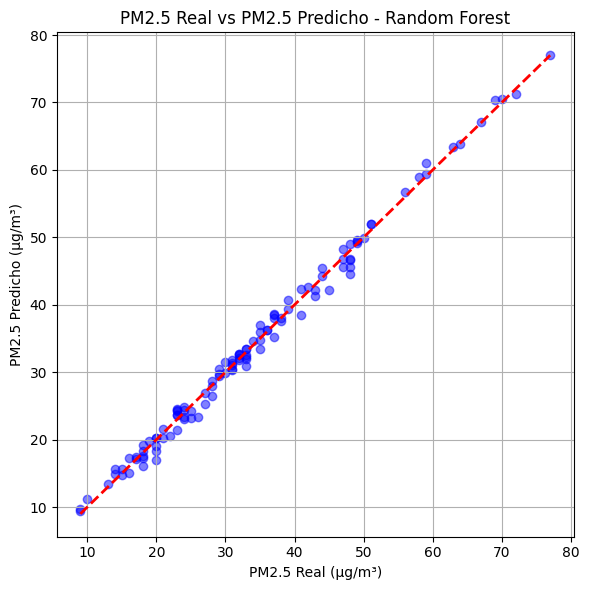

In [81]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("PM2.5 Real (µg/m³)")
plt.ylabel("PM2.5 Predicho (µg/m³)")
plt.title("PM2.5 Real vs PM2.5 Predicho - Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# **8. Análisis por predicción**

In [82]:
X_test_with_preds['day'] = np.select(
    [
        X_test_with_preds['day_Monday'] == 1,
        X_test_with_preds['day_Tuesday'] == 1,
        X_test_with_preds['day_Wednesday'] == 1,
        X_test_with_preds['day_Thursday'] == 1,
        X_test_with_preds['day_Friday'] == 1,
        X_test_with_preds['day_Saturday'] == 1,
        X_test_with_preds['day_Sunday'] == 1
    ],
    [
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ],
    default='Unknown'
)

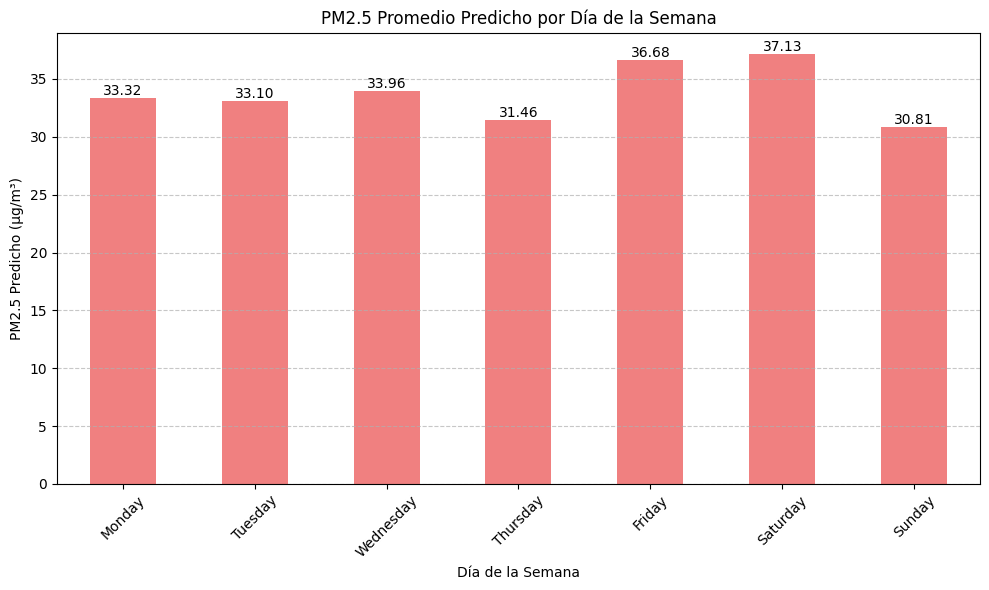

PM2.5 Promedio Predicho por Día de la Semana:
day
Monday       33.319865
Tuesday      33.099600
Wednesday    33.955266
Thursday     31.455443
Friday       36.682114
Saturday     37.130998
Sunday       30.805853
Name: PM2.5_predicho, dtype: float64


In [84]:
mean_pm25_by_day = X_test_with_preds.groupby('day')['PM2.5_predicho'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = mean_pm25_by_day.plot(kind='bar', ax=ax, color='lightcoral')

# Añadir etiquetas a cada barra
for bar in bars.containers:
    bars.bar_label(bar, fmt='%.2f', label_type='edge')

# Estética del gráfico
plt.title('PM2.5 Promedio Predicho por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('PM2.5 Predicho (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imprimir valores
print("PM2.5 Promedio Predicho por Día de la Semana:")
print(mean_pm25_by_day)

Los resultados del modelo muestran que la calidad del aire —evaluada mediante las concentraciones promedio de material particulado fino PM2.5— varía según el día de la semana. Los días sábado (37.13 µg/m³) y viernes (36.68 µg/m³) presentan los niveles más altos, seguidos por el miércoles (33.96 µg/m³), superando en varios casos los límites recomendados por la OMS para una exposición saludable (12–35 µg/m³). Esto sugiere una mayor presencia de contaminantes atmosféricos en jornadas de alta actividad urbana o vehicular. En contraste, jueves (31.46 µg/m³) y domingo (30.81 µg/m³) registran las concentraciones más bajas, posiblemente asociadas a una reducción en el flujo vehicular o en actividades industriales. Estos patrones semanales ofrecen información valiosa para diseñar estrategias de mitigación específicas, como regulaciones de emisiones o campañas de sensibilización focalizadas en los días con mayores niveles de contaminación.

Un valor muy alto de PM2.5, o partículas finas, se considera generalmente cuando supera los 35.4 microgramos por metro cúbico (μg/m³) en un período de 24 horas, según Indoor Air Hygiene Institute. La Organización Mundial de la Salud (OMS) considera que un promedio anual de más de 10 μg/m³ puede tener efectos negativos en la salud. Además, niveles superiores a 500 μg/m³ pueden ser considerados peligrosos y activar alertas.